## Abstract:
Hello, hello! Welcome to my emissions project!
  I began this Project with an idea made from observations in the the world of CO2 emissions. There has been a steady increase in the world's GDP per capita, some say that is due to the industrial revolution and the oil mining that comes with it. Although this holds true in history, I hypothesized that the correlation between rising CO2 per capita, and rising GDP per capita will not be as directly correlated in the future! This project goes through muliple countries GDP and CO2 growth per capita by pulling from the certified dataset of all the countries World emissions. After the EDA's(exploratory Data Analysis), I saw that there was correlation between CO2 emissions and GDP growth, however it was only up to a certain point. This correlation did not persist in all countries with high GDP and more importantly, there were even some countries that show high economic growth and extremely low emissions! I concluded that although we've as a global economy have been heavily reliant on fossil fuels for a prosperous economy, in the future, because of all the economic policies as well as efforts made to turn away from carbon reliance, that will no longer be the case! There may even be a rise in GDP in the future like seen in countries like Germany, France, and the US, that will have nothing to do with carbon reliance. The future looks green!  (and possibly nuclear, idk ask France).

THANK YOU!!! For taking the time to look through my project, and also having an interest in topics related to climate change and GDP growth. I hope you found this interesting and insightful!

let us begin:
this below is the world CO2-emissions-vs-GDP dataset that i will be pulling from for this project

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('co2-emissions-vs-gdp.csv')
df

,Entity,Code,Year,Annual CO₂ emissions (per capita),GDP per capita,900793-annotations,Population (historical),World regions according to OWID
0,Afghanistan,AFG,1949,0.001992,NaN,NaN,7356890.0,NaN
1,Afghanistan,AFG,1950,0.010837,1156.0,NaN,7776182.0,NaN
2,Afghanistan,AFG,1951,0.011625,1170.0,NaN,7879343.0,NaN
3,Afghanistan,AFG,1952,0.011468,1189.0,NaN,7987783.0,NaN
4,Afghanistan,AFG,1953,0.013123,1240.0,NaN,8096703.0,NaN
...,...,...,...,...,...,...,...,...
64564,Zimbabwe,ZWE,1898,NaN,NaN,NaN,1084831.0,NaN
64565,Zimbabwe,ZWE,1899,NaN,NaN,NaN,1097325.0,NaN
64566,Zimbabwe,ZWE,1900,NaN,NaN,NaN,1111376.0,NaN
64567,Zimbabwe,ZWE,1901,NaN,NaN,NaN,1127021.0,NaN


# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64569 entries, 0 to 64568
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             64569 non-null  object 
 1   Code                               59425 non-null  object 
 2   Year                               64569 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26182 non-null  float64
 4   GDP per capita                     21586 non-null  float64
 5   900793-annotations                 28 non-null     object 
 6   Population (historical)            59177 non-null  float64
 7   World regions according to OWID    271 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.9+ MB


In [6]:
df.isnull().sum()

,0
Entity,0
Code,5144
Year,0
Annual CO₂ emissions (per capita),38387
GDP per capita,42983
900793-annotations,64541
Population (historical),5392
World regions according to OWID,64298


In [13]:
df.shape

(15265, 6)

In [8]:
df = df.drop(columns=['900793-annotations', 'World regions according to OWID'])

In [9]:
df.dropna(inplace=True)

In [10]:
# change column name
df.rename(columns={'Annual CO₂ emissions (per capita)': 'Annual CO2 emissions'}, inplace=True)

In [11]:
df.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel',

In [12]:
!pip install plotly


# preliminary EDA:
What am i looking at?

In [14]:
# graph annual CO2 emissions and GDP per capita columns
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

# Create the interactive scatter plot
fig = px.scatter(df, x='GDP per capita', y='Annual CO2 emissions',
                 title="GDP per Capita vs Annual CO2 Emissions",
                 labels={'GDP per capita': 'GDP per Capita', 'Annual CO2 emissions': 'Annual CO2 Emissions'},
                 hover_data=['GDP per capita', 'Annual CO2 emissions'],
                 color='Entity',
                 color_discrete_sequence=px.colors.qualitative.Plotly
                 )


# Show the figure
fig.show()


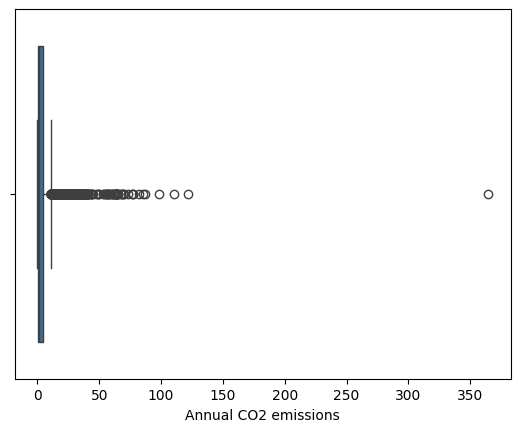

In [15]:
sns.boxplot(x=df['Annual CO2 emissions'])

plt.show()

In [16]:
fig = px.scatter(df, x='Population (historical)', y='Annual CO2 emissions',
                 title="Population (historical) vs Annual CO2 Emissions",
                 labels={'Population (historical)': 'Population (historical)', 'Annual CO2 emissions': 'Annual CO2 Emissions'},
                 hover_data=['Population (historical)', 'Annual CO2 emissions'],
                 color='Entity',
                 color_discrete_sequence=px.colors.qualitative.Plotly
                 )

# Show the figure
fig.show()

# USA data

In [17]:
# just the US data?

trend_data = df[['Entity', 'Year', 'Annual CO2 emissions', 'GDP per capita']].dropna()

# this line takes data only from the US
us_data = trend_data[trend_data['Entity'] == 'United States']


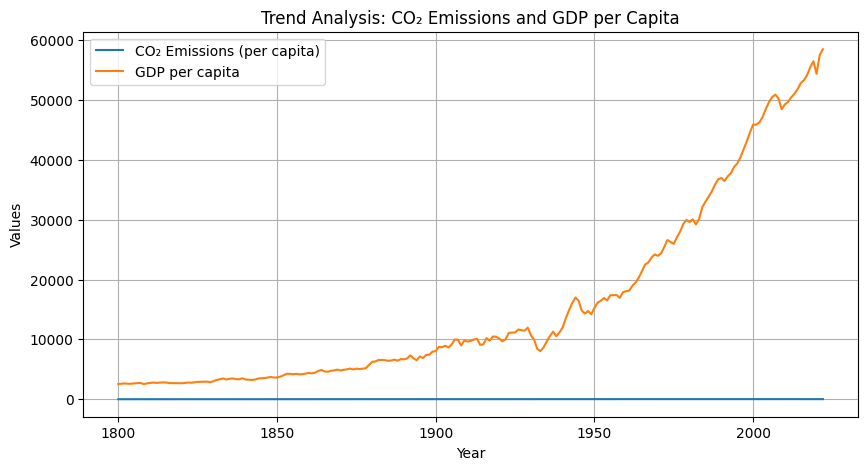

In [18]:
# Plot CO₂ emissions per capita over time
plt.figure(figsize=(10, 5))
plt.plot(us_data['Year'], us_data['Annual CO2 emissions'], label='CO₂ Emissions (per capita)')
plt.plot(us_data['Year'], us_data['GDP per capita'], label='GDP per capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trend Analysis: CO₂ Emissions and GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# correlation analysis
correlation_data = us_data[['Annual CO2 emissions', 'GDP per capita']].dropna()

correlation = correlation_data.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                      Annual CO2 emissions  GDP per capita
Annual CO2 emissions              1.000000        0.759147
GDP per capita                    0.759147        1.000000


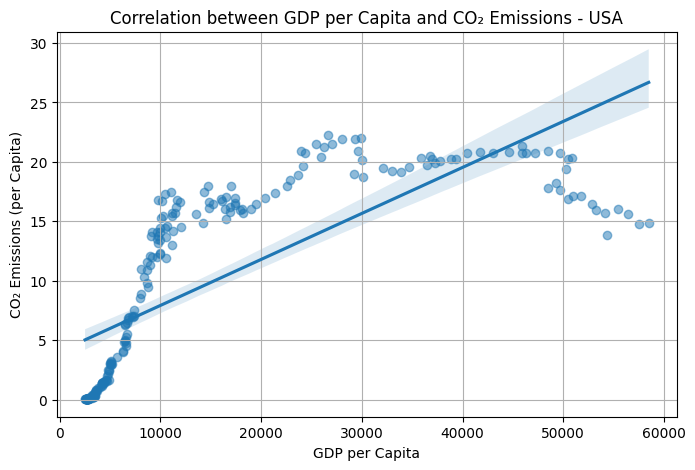

In [20]:
# Scatter plot with regression line - MO BETTA GRAPH *lol*
plt.figure(figsize=(8, 5))
sns.regplot(x='GDP per capita', y='Annual CO2 emissions', data=correlation_data, scatter_kws={'alpha':0.5})
plt.xlabel('GDP per Capita')
plt.ylabel('CO₂ Emissions (per Capita)')
plt.title('Correlation between GDP per Capita and CO₂ Emissions - USA')
plt.grid(True)
plt.show()


# Germany trend data

In [21]:
Germany_data = trend_data[trend_data['Entity'] == 'Germany']

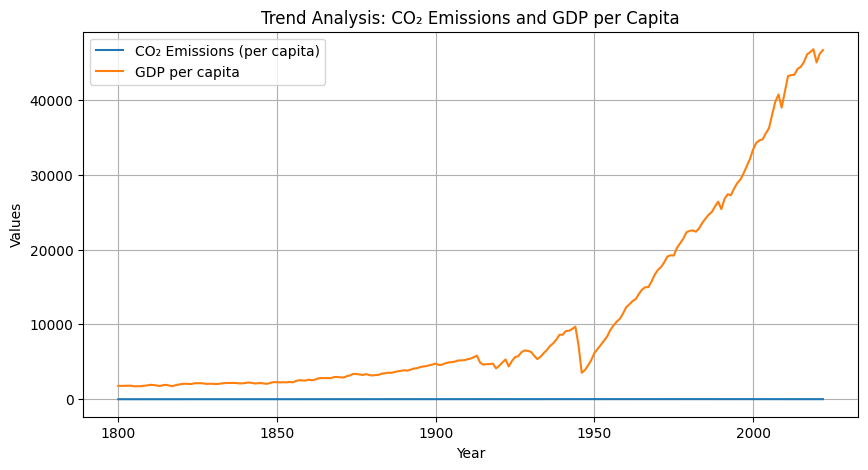

In [22]:
# Plot CO₂ emissions per capita over time for Germany
plt.figure(figsize=(10, 5))
plt.plot(Germany_data['Year'], Germany_data['Annual CO2 emissions'], label='CO₂ Emissions (per capita)')
plt.plot(Germany_data['Year'], Germany_data['GDP per capita'], label='GDP per capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trend Analysis: CO₂ Emissions and GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# correlation analysis
German_correlation_data = Germany_data[['Annual CO2 emissions', 'GDP per capita']].dropna()

German_correlation = German_correlation_data.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                      Annual CO2 emissions  GDP per capita
Annual CO2 emissions              1.000000        0.759147
GDP per capita                    0.759147        1.000000


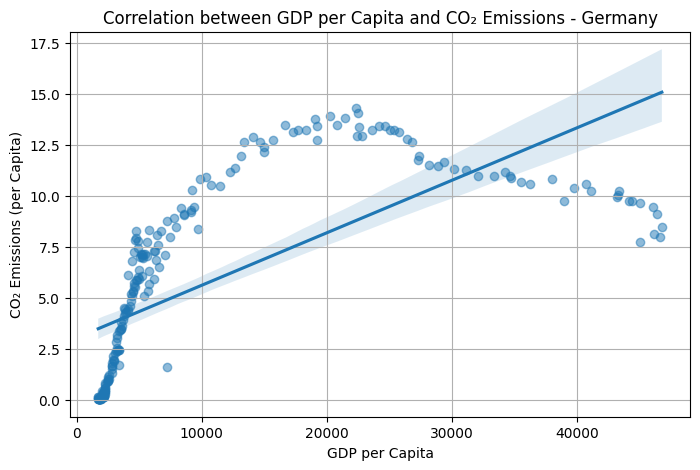

In [24]:
# Scatter plot with regression line - MO BETTA GRAPH *lol* *still funny the second time - MO BETTA GRAPH!!
plt.figure(figsize=(8, 5))
sns.regplot(x='GDP per capita', y='Annual CO2 emissions', data=German_correlation_data, scatter_kws={'alpha':0.5})
plt.xlabel('GDP per Capita')
plt.ylabel('CO₂ Emissions (per Capita)')
plt.title('Correlation between GDP per Capita and CO₂ Emissions - Germany')
plt.grid(True)
plt.show()


# Viva La France! (or maybe not if high emissions? we'll see!)

In [25]:
baguette_data = trend_data[trend_data['Entity'] == 'France']

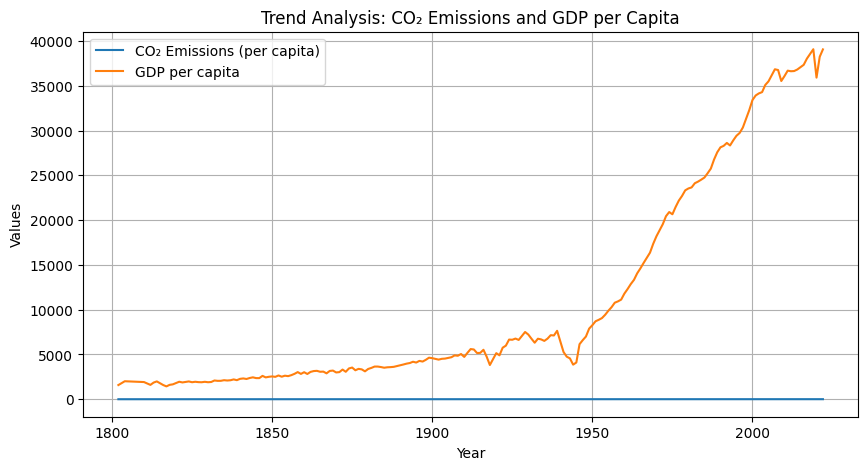

In [26]:
# Plot CO₂ emissions per capita over time for Germany
plt.figure(figsize=(10, 5))
plt.plot(baguette_data['Year'], baguette_data['Annual CO2 emissions'], label='CO₂ Emissions (per capita)')
plt.plot(baguette_data['Year'], baguette_data['GDP per capita'], label='GDP per capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trend Analysis: CO₂ Emissions and GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# correlation analysis
baguette_correlation_data =baguette_data[['Annual CO2 emissions', 'GDP per capita']].dropna()

French_correlation = baguette_correlation_data.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                      Annual CO2 emissions  GDP per capita
Annual CO2 emissions              1.000000        0.759147
GDP per capita                    0.759147        1.000000


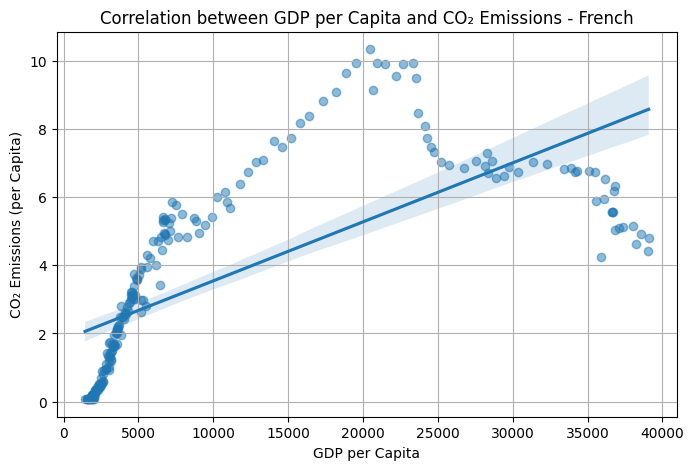

In [28]:
# Scatter plot with regression line - MO BETTA GRAPH *lol* *still funny the second time - MO BETTA GRAPH!! - third? nah, yeah nah, jokes dead...
plt.figure(figsize=(8, 5))
sns.regplot(x='GDP per capita', y='Annual CO2 emissions', data=baguette_correlation_data, scatter_kws={'alpha':0.5})
plt.xlabel('GDP per Capita')
plt.ylabel('CO₂ Emissions (per Capita)')
plt.title('Correlation between GDP per Capita and CO₂ Emissions - French')
plt.grid(True)
plt.show()

viva la france!!!

# Ok! so we did two countries that lead the Paris agreement of 2015, what about two countries that didnt sign it? Lets start with Libya

In [29]:
Libya_data = trend_data[trend_data['Entity'] == 'Libya']

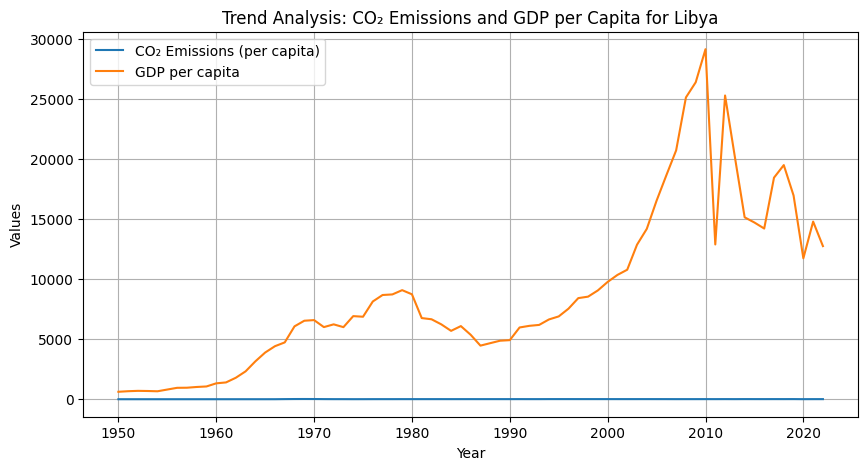

In [30]:
# Plot CO₂ emissions per capita over time for Germany
plt.figure(figsize=(10, 5))
plt.plot(Libya_data['Year'], Libya_data['Annual CO2 emissions'], label='CO₂ Emissions (per capita)')
plt.plot(Libya_data['Year'], Libya_data['GDP per capita'], label='GDP per capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trend Analysis: CO₂ Emissions and GDP per Capita for Libya')
plt.legend()
plt.grid(True)
plt.show()

oh?


In [31]:
# correlation analysis
Libya_correlation_data =Libya_data[['Annual CO2 emissions', 'GDP per capita']].dropna()

Libya_correlation = Libya_correlation_data.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                      Annual CO2 emissions  GDP per capita
Annual CO2 emissions              1.000000        0.759147
GDP per capita                    0.759147        1.000000


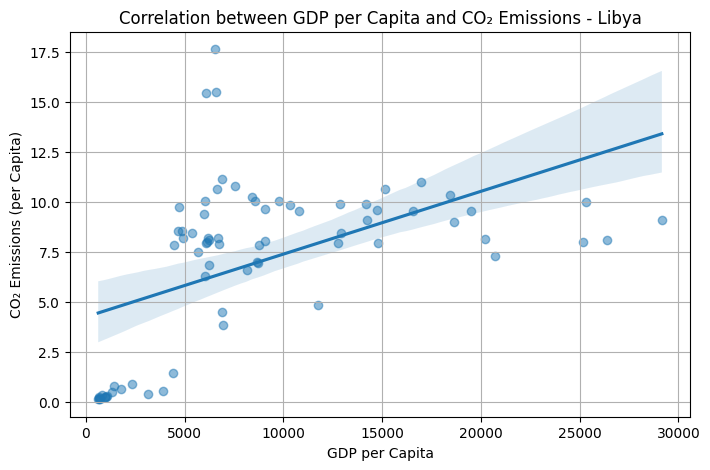

In [32]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='GDP per capita', y='Annual CO2 emissions', data= Libya_correlation_data, scatter_kws={'alpha':0.5})
plt.xlabel('GDP per Capita')
plt.ylabel('CO₂ Emissions (per Capita)')
plt.title('Correlation between GDP per Capita and CO₂ Emissions - Libya')
plt.grid(True)
plt.show()

pfft, wuht

# Iran?

In [33]:
Iran_data = trend_data[trend_data['Entity'] == 'Iran']

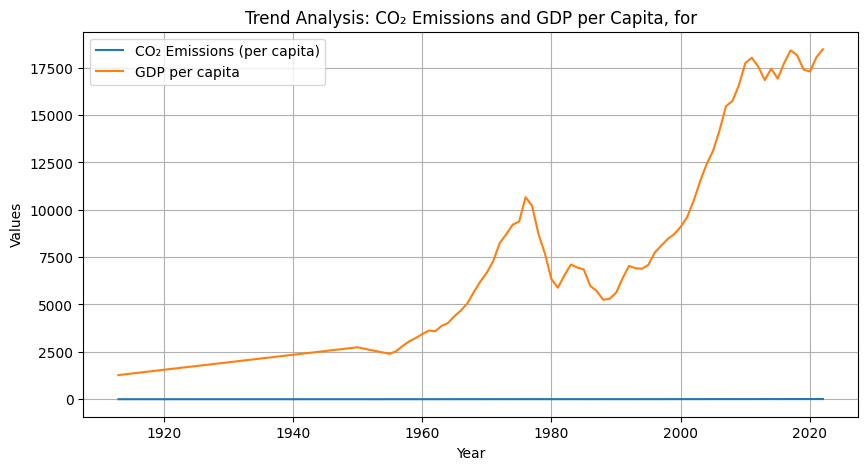

In [34]:
# Plot CO₂ emissions per capita over time for Iran
plt.figure(figsize=(10, 5))
plt.plot(Iran_data['Year'], Iran_data['Annual CO2 emissions'], label='CO₂ Emissions (per capita)')
plt.plot(Iran_data['Year'], Iran_data['GDP per capita'], label='GDP per capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trend Analysis: CO₂ Emissions and GDP per Capita, for')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# correlation analysis
Iran_correlation_data =Iran_data[['Annual CO2 emissions', 'GDP per capita']].dropna()

Iran_correlation = Iran_correlation_data.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                      Annual CO2 emissions  GDP per capita
Annual CO2 emissions              1.000000        0.759147
GDP per capita                    0.759147        1.000000


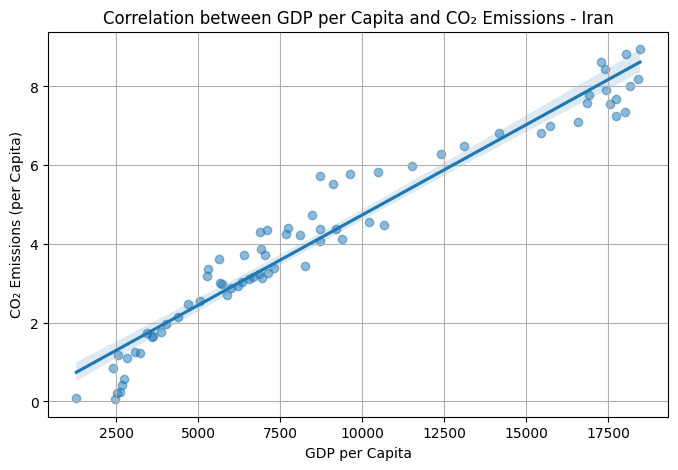

In [36]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='GDP per capita', y='Annual CO2 emissions', data= Iran_correlation_data, scatter_kws={'alpha':0.5})
plt.xlabel('GDP per Capita')
plt.ylabel('CO₂ Emissions (per Capita)')
plt.title('Correlation between GDP per Capita and CO₂ Emissions - Iran')
plt.grid(True)
plt.show()

Hm, odd. Iran is quite low!

# What about Saudi Arabia?

In [37]:
Saudi_Arabia_data = trend_data[trend_data['Entity'] == 'Saudi Arabia']

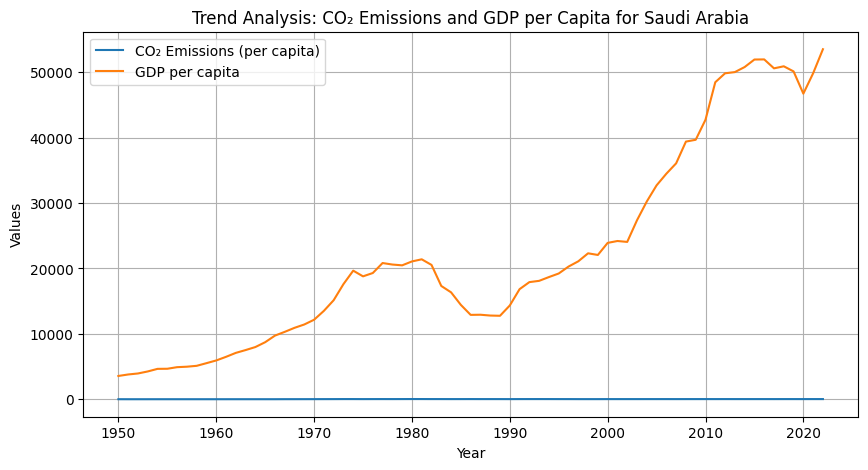

In [38]:
# Plot CO₂ emissions per capita over time for Saudi Arabia
plt.figure(figsize=(10, 5))
plt.plot(Saudi_Arabia_data['Year'], Saudi_Arabia_data['Annual CO2 emissions'], label='CO₂ Emissions (per capita)')
plt.plot(Saudi_Arabia_data['Year'], Saudi_Arabia_data['GDP per capita'], label='GDP per capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trend Analysis: CO₂ Emissions and GDP per Capita for Saudi Arabia')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
3 # correlation analysis for Saudi Arabia
Saudi_Arabia_correlation_data =Saudi_Arabia_data[['Annual CO2 emissions', 'GDP per capita']].dropna()

Saudi_Arabia_correlation = Saudi_Arabia_correlation_data.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                      Annual CO2 emissions  GDP per capita
Annual CO2 emissions              1.000000        0.759147
GDP per capita                    0.759147        1.000000


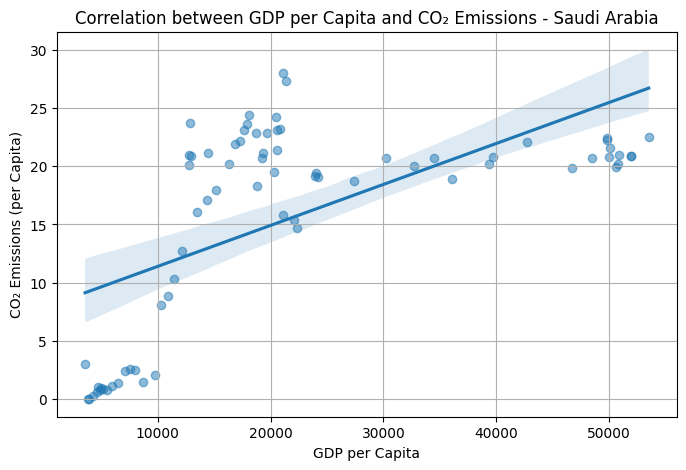

In [40]:
# Scatter plot with regression line For Saudi Arabia
plt.figure(figsize=(8, 5))
sns.regplot(x='GDP per capita', y='Annual CO2 emissions', data= Saudi_Arabia_correlation_data, scatter_kws={'alpha':0.5})
plt.xlabel('GDP per Capita')
plt.ylabel('CO₂ Emissions (per Capita)')
plt.title('Correlation between GDP per Capita and CO₂ Emissions - Saudi Arabia')
plt.grid(True)
plt.show()

# Conclusions

In [41]:
countries_of_interest = ['United States', 'Germany', 'France', 'Iran', 'Saudi Arabia']
filtered_data = df[df['Entity'].isin(countries_of_interest)]
filtered_data = filtered_data[['Entity', 'Year', 'Annual CO2 emissions', 'GDP per capita']].dropna()


filtered_data['Year'] = filtered_data['Year'].astype(int)


filtered_data.head()

,Entity,Year,Annual CO2 emissions,GDP per capita
19690,France,1802,0.076622,1583.4694
19691,France,1804,0.073936,2008.1430
19692,France,1810,0.070470,1916.6487
19693,France,1811,0.067903,1765.3041
19694,France,1812,0.073086,1601.3053


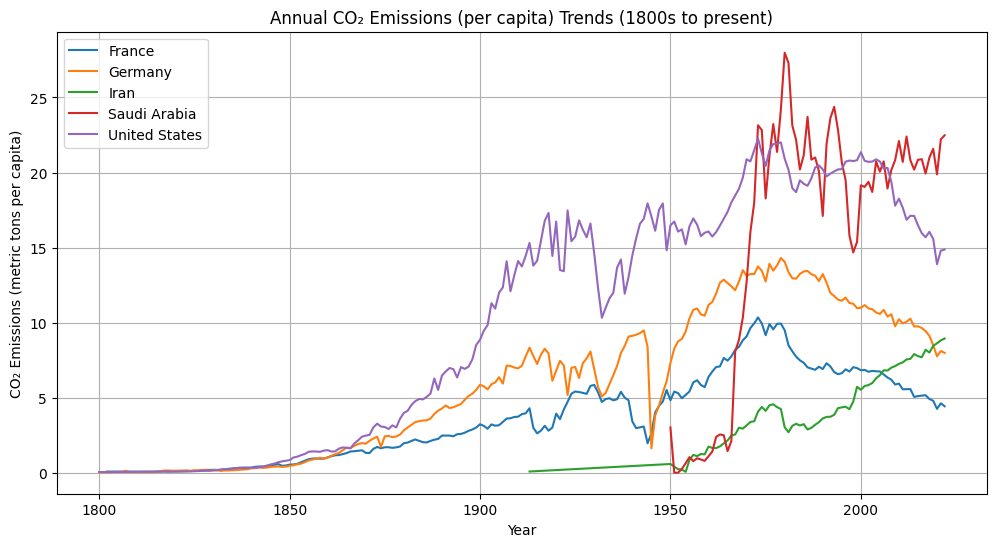

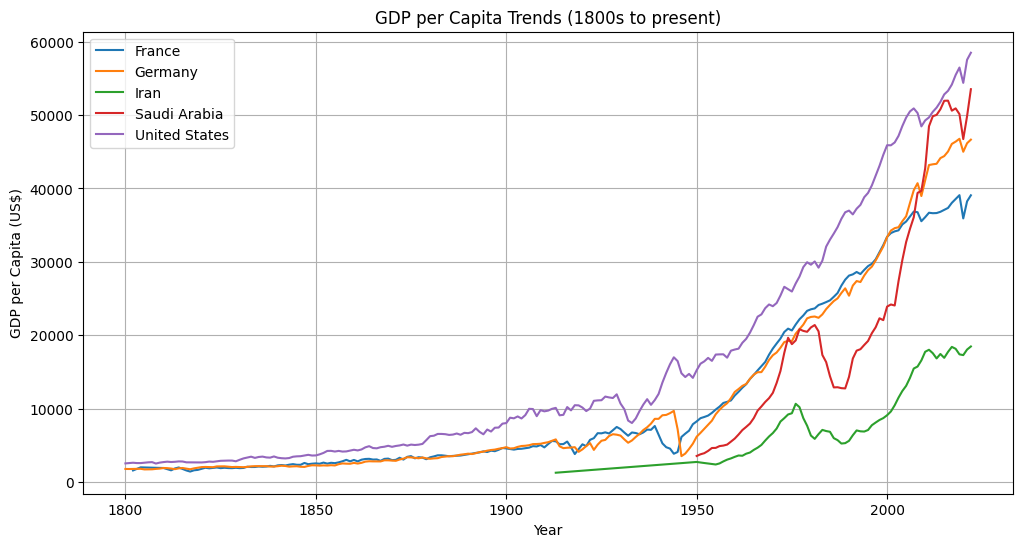

In [42]:
# Group data by country for easier plotting
grouped_data = filtered_data.groupby('Entity')

# Plot CO₂ emissions (per capita) trends
plt.figure(figsize=(12, 6))
for country, group in grouped_data:
    plt.plot(group['Year'], group['Annual CO2 emissions'], label=country)

plt.title('Annual CO₂ Emissions (per capita) Trends (1800s to present)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (metric tons per capita)')
plt.legend()
plt.grid(True)
plt.show()

# Plot GDP per capita trends
plt.figure(figsize=(12, 6))
for country, group in grouped_data:
    plt.plot(group['Year'], group['GDP per capita'], label=country)

plt.title('GDP per Capita Trends (1800s to present)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (US$)')
plt.legend()
plt.grid(True)
plt.show()

# conclusions:



---

### **CO₂ Emissions (Per Capita):**

1.  **United States:**
    
    *  We've historicallly been dominant(or excessive depending om who you ask), in CO₂ emissions
    * This can be contributed to the fact that we are an industrial leader and have always had a heavy reliance on fossil fuels, particularly in the mid-20th century.
        
    *  However, Recent declines suggest efforts towards renewable energy adoption, and stricter environmental regulations.
        
2.  **Germany:**
    
    *   An unexpeted but similar historical trend to the United States was seen
    * However, the decline in emissions is more pronounced
    * This indicates a strong commitment to renewable energy and the phasing out of coal, which correlates to all the pro climate movements that happened in the EU post 2000's, (i.e. paris Agreement of 2015).
        
3.  **France:**
    
    * Honestly impressed and suprised by france! They Exhibit significantly lower emissions compared to Germany and the USA!
    * This aligns with its reliance on nuclear energy as a primary power source.
    * Fun fact: they get OVER 70% of their energy SOLEY from nuclear!
        
4.  **Iran Libya and Saudi Arabia:**
    
    *   These countries are heavily reliant on fossil fuels, no suprise there
    * Saudi Arabia's emissions correlate closely with oil production and export demands.
    * Iran shows a steady increase, likely tied to domestic industrial expansion and population growth.
        

### **GDP Per Capita:**

1.  **United States:**
    
    *  The leading GDP per capita reflects a diverse and advanced economy, there no mistaking it. When it comes to GDP, theres a clear winner!
    *  This checks out, the US has been emphasizing technology, services, and high productivity state and country-wide for some time now.
        
2.  **Germany and France:**
    
    * Both exhibit strong GDP per capita!
    * This is reflective of their advanced economies.
    * France's curve is slightly steadier, while Germany shows more pronounced post-World War II growth.
        
3.  **Iran Libya and Saudi Arabia:**
    
    * Low GDP per capita compared to Western countries, but Saudi Arabia exhibits rapid increases due to oil revenues.
    * This isn't seen in Libya's not Irans case in spite of their heavy reliance on fossil fuels for economic Growth
    * Iran's slower economic growth in particular may result from international sanctions and political challenges... and war. Can't forget that...
        

### **Comparative Insights:**

1.  **Economic Development vs. Emissions:**
    
    *   Advanced economies like the USA, Germany, and France have started decoupling economic growth from emissions through technology and energy policy.
        
    *   Emerging economies like Iran Libya and Saudi Arabia still show strong ties between GDP and emissions, emphasizing their reliance on traditional energy sources.
        
2.  **Policy Impacts:**
    
    *   Germany and France highlight the role of energy policy in reducing emissions without significantly impacting GDP growth.
    * there are even signs that point towards the idea that decoupling from CO2 heavy reliance may lead to more GDP growth overtime!
    * In contrast, the USA's recent reductions are relatively new and gradual.

        
3.  **Energy Profiles:**
    
    *   France's reliance on nuclear energy stands out as a unique factor in achieving low emissions alongside high economic output.
        
    *   Saudi Arabia Libya and Iran's emissions trajectory underscores the challenges of transitioning from oil-dependent economies.
